In [1]:
import os
thisFilePath=os.path.abspath('.')
os.chdir(thisFilePath)
os.getcwd()

'D:\\my python file\\mypython'

## 导入数据

In [2]:
import pandas as pd
df1=pd.read_csv('Basket-2018-06-01-2018-07-05.csv')
df1.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


In [3]:
import pandas as pd
df2=pd.read_csv('item-2018-06-01-2018-07-05.csv')
df2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


## 数据概览

In [7]:
df1.shape

(571552, 5)

In [8]:
df2.shape

(1048575, 10)

In [9]:
df1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [10]:
df2.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.016397e+00,1.611352e+05,1.147050e+05,1.490041e+00,1.363701e+01,1.483649e+01,-1.960952e+00
std,2.478932e+00,8.605571e+04,8.133691e+04,8.255032e+00,1.089738e+02,2.504771e+01,6.330616e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-1.200000e+02,-8.700000e+02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.477400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695360e+05,1.244580e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.177830e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,6.960000e+02


## 数据清洗

In [14]:
df1.dtypes #查看一下各个列的数据类型

SHOP_DATETIME      object
STORE_CODE         object
POS_NO              int64
BASK_CODE           int64
BASK_SPEND        float64
dtype: object

In [12]:
df2.dtypes

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE            int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

In [24]:
#从上面发现列名不符合Python的命名规范，对列名进行一下重命名，采用下划线命名法：
df1.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df1.dtypes 

SHOP_DATETIME_     object
STORE_CODE         object
POS_NO_             int64
BASK_CODE___        int64
BASK_SPEND        float64
dtype: object

In [27]:
df2.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df2.dtypes 

SDATE              datetime64[ns]
STORE_CODE                 object
POSID                       int64
BASK_CODE_                  int64
PROD_CODE                   int64
ITEM_QUANTITY             float64
ITEM_SPEND                float64
NORMAL_PRICE              float64
DISCOUNT_TYPE              object
DISCOUNT_AMOUNT           float64
dtype: object

In [26]:
#下单日期应为datetime类型，需要进行处理。
df1["SHOP_DATETIME_"] = pd.to_datetime(df1["SHOP_DATETIME_"]) 
df2["SDATE"].sample(5)

720348   2018-06-17
533719   2018-06-09
478858   2018-06-09
88487    2018-06-02
613795   2018-06-13
Name: SDATE, dtype: datetime64[ns]

In [20]:
df2["SDATE"] = pd.to_datetime(df2["SDATE"]) 
df2["SDATE"].sample(5)

389344   2018-06-10
512503   2018-06-14
707304   2018-06-14
537677   2018-06-09
458063   2018-06-09
Name: SDATE, dtype: datetime64[ns]

In [29]:
#缺失值处理
df1.isnull().sum(axis=0)

SHOP_DATETIME_    0
STORE_CODE        0
POS_NO_           0
BASK_CODE___      0
BASK_SPEND        0
dtype: int64

In [30]:
df2.isnull().sum(axis=0)

SDATE              0
STORE_CODE         0
POSID              0
BASK_CODE_         0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
dtype: int64

In [31]:
#简单查看一下是否有异常值
df1.describe()

,POS_NO_,BASK_CODE___,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [34]:
#看一下是否有重复值
df1.duplicated().sum()

0

In [35]:
df2.duplicated().sum()   #无需处理

128777

## 数据分析

In [36]:
store_number=df1.drop_duplicates(subset=['STORE_CODE'])
store_number

,SHOP_DATETIME_,STORE_CODE,POS_NO_,BASK_CODE___,BASK_SPEND
0,2018-06-01,D007,3,250458,8.00
12,2018-06-01,A019,1,192101,15.37
13,2018-06-01,D008,1,197147,10.70
16,2018-06-01,D009,3,144146,3.60
24,2018-06-02,A001,6,229732,7.50
35,2018-06-01,D002,4,143637,132.80
62,2018-06-01,D003,2,53190,30.90
64,2018-06-01,D004,1,173594,21.00
69,2018-06-01,D005,2,204925,71.40
73,2018-06-01,D006,3,148666,26.99


In [37]:
store_number.shape

(24, 5)

In [38]:
store_number=df2.drop_duplicates(subset=['STORE_CODE'])
store_number

,SDATE,STORE_CODE,POSID,BASK_CODE_,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.30
288,2018-06-01,A019,2,24592,194906,0.056,1.88,33.6,n,0.00
366,2018-06-01,D008,4,17849,77420,1.000,92.80,112.0,p,-19.20
500,2018-06-01,D009,3,144271,83512,2.000,4.40,2.2,n,0.00
808,2018-06-02,A001,6,229611,15930,1.000,1.80,1.8,n,0.00
1006,2018-06-01,D002,4,143702,189589,1.000,25.50,29.5,p,-4.00
1800,2018-06-01,D003,2,53026,194690,1.074,3.20,3.9,p,-0.99
1843,2018-06-01,D004,2,15875,91677,1.000,4.90,4.9,n,0.00
2009,2018-06-01,D005,2,204976,221923,1.000,14.90,20.5,p,-5.60
2112,2018-06-01,D006,3,148613,219924,1.000,8.80,8.8,n,0.00


In [39]:
store_number.shape

(24, 10)

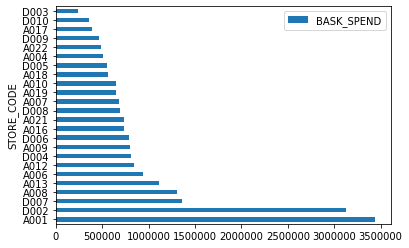

In [43]:
import matplotlib.pyplot as plt
df1_spend=df1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
df1_spend.set_index('STORE_CODE',inplace=True)
df1_spend.plot(kind='barh')

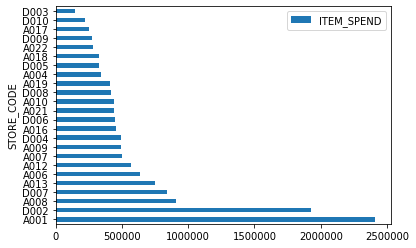

In [44]:
df2_spend=df2.groupby('STORE_CODE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)#商店按消费额大小排序
df2_spend.set_index('STORE_CODE',inplace=True)
df2_spend.plot(kind='barh')